In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
decoder = pd.read_csv('feature_scaled_data/decoder.csv')
grouped = decoder.groupby(['코드종류'])
decoder_map = {name[0]: group.set_index('코드').drop('코드종류', axis = 1).squeeze() for name, group in grouped}

decoder_map['gender']
decoder

,코드종류,코드,종류
0,gender,0,남자
1,gender,1,여자
2,age,0,0 ~ 9세
3,age,1,10 ~ 19세
4,age,2,20 ~ 29세
5,age,3,30 ~ 39세
6,age,4,40 ~ 49세
7,age,5,50 ~ 59세
8,age,6,60 ~ 69세
9,age,7,70 ~ 79세


In [3]:
hdong = pd.read_csv('feature_scaled_data/hdong.csv', index_col=['행정동코드'])
hdong

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1100000000,서울특별시,NaN,NaN,서울특별시
1111000000,서울특별시,종로구,NaN,서울특별시 종로구
1111051500,서울특별시,종로구,청운효자동,서울특별시 종로구 청운효자동
1111053000,서울특별시,종로구,사직동,서울특별시 종로구 사직동
1111054000,서울특별시,종로구,삼청동,서울특별시 종로구 삼청동
...,...,...,...,...
5183031000,강원특별자치도,양양군,서면,강원특별자치도 양양군 서면
5183032000,강원특별자치도,양양군,손양면,강원특별자치도 양양군 손양면
5183033000,강원특별자치도,양양군,현북면,강원특별자치도 양양군 현북면


In [ ]:
hdong.isna()

In [170]:
def series_decoder(series):
    # 더미  생성
    dummy_series = pd.Series(series)
    
    # hdong.loc[df['origin_hon']]를 더미 시리즈에 삽입
    dummy_series['origin_hdong_cd'] = hdong.loc[series['origin_hdong_cd'], '주소']
    dummy_series['dest_hdong_cd'] = hdong.loc[series['dest_hdong_cd'], '주소']

    for key in decoder_map.keys():
        # dummy_series[key] = decoder_map[key][series[key]]
        if key == 'purpose':
            dummy_series['origin_purpose'] = decoder_map[key][series['origin_purpose']]
            dummy_series['dest_purpose'] =  decoder_map[key][series['dest_purpose']]
            continue
        dummy_series[key] = decoder_map[key][series[key]]
    
    return dummy_series


In [169]:
series_decoder(oct_07.iloc[0])

origin_hdong_cd      서울특별시 노원구 상계2동
dest_hdong_cd      서울특별시 노원구 상계6.7동
date                       20231007
start_time                    19:00
end_time                      19:00
gender                           여자
age                        20 ~ 29세
modal                            차량
origin_purpose                   기타
dest_purpose                     기타
od_dist_avg                   11015
od_duration_avg                  16
od_cnts                          17
Name: 0, dtype: object

In [48]:
sep_01 = pd.read_csv('datas/od_20230901_10/od_20230901_1.csv')
sep_01.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1130563500,1130559500,20230901,12:00,13:00,1,3,0.0,1.0,1,10869,58,7
1,2714072000,2714073000,20230901,12:00,12:00,1,4,0.0,0.0,0,2018,4,16
2,3017055500,3017058700,20230901,18:00,18:00,1,2,0.0,4.0,0,14070,39,8
3,2917067300,2917059000,20230901,19:00,19:00,0,4,0.0,0.0,0,2738,9,22
4,2714058000,4729025300,20230901,21:00,22:00,1,1,2.0,3.0,0,43707,85,10


In [56]:
sep_temp1 = sep_01.groupby(['dest_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
sep_temp1.head()

,dest_hdong_cd,od_cnts
0,1174069000,241860
1,1171056600,114038
2,4139058900,106799
3,4139059100,101927
4,2635051000,96202


In [78]:
sep_temp2 = sep_01.groupby(['origin_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
sep_temp2.head()

,origin_hdong_cd,od_cnts
0,4127357000,117006
1,1168064000,94400
2,1111061500,69082
3,1114055000,68195
4,1154551000,64000


In [79]:
hdong.loc[sep_temp1.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1174069000,서울특별시,강동구,둔촌제1동,서울특별시 강동구 둔촌제1동
1171056600,서울특별시,송파구,오륜동,서울특별시 송파구 오륜동
4139058900,경기도,시흥시,정왕본동,경기도 시흥시 정왕본동
4139059100,경기도,시흥시,정왕1동,경기도 시흥시 정왕1동
2635051000,부산광역시,해운대구,우제1동,부산광역시 해운대구 우제1동
4121052000,경기도,광명시,광명2동,경기도 광명시 광명2동
1168066000,서울특별시,강남구,개포1동,서울특별시 강남구 개포1동
2641061000,부산광역시,금정구,장전제2동,부산광역시 금정구 장전제2동
2920063700,광주광역시,광산구,수완동,광주광역시 광산구 수완동


In [80]:
hdong.loc[sep_temp2.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
4127357000,경기도,안산시 단원구,초지동,경기도 안산시 단원구 초지동
1168064000,서울특별시,강남구,역삼1동,서울특별시 강남구 역삼1동
1111061500,서울특별시,종로구,종로1.2.3.4가동,서울특별시 종로구 종로1.2.3.4가동
1114055000,서울특별시,중구,명동,서울특별시 중구 명동
1154551000,서울특별시,금천구,가산동,서울특별시 금천구 가산동
1174070000,서울특별시,강동구,둔촌제2동,서울특별시 강동구 둔촌제2동
1156054000,서울특별시,영등포구,여의동,서울특별시 영등포구 여의동
1174066000,서울특별시,강동구,성내제3동,서울특별시 강동구 성내제3동
4513069000,전라북도,군산시,수송동,전라북도 군산시 수송동


<Axes: >

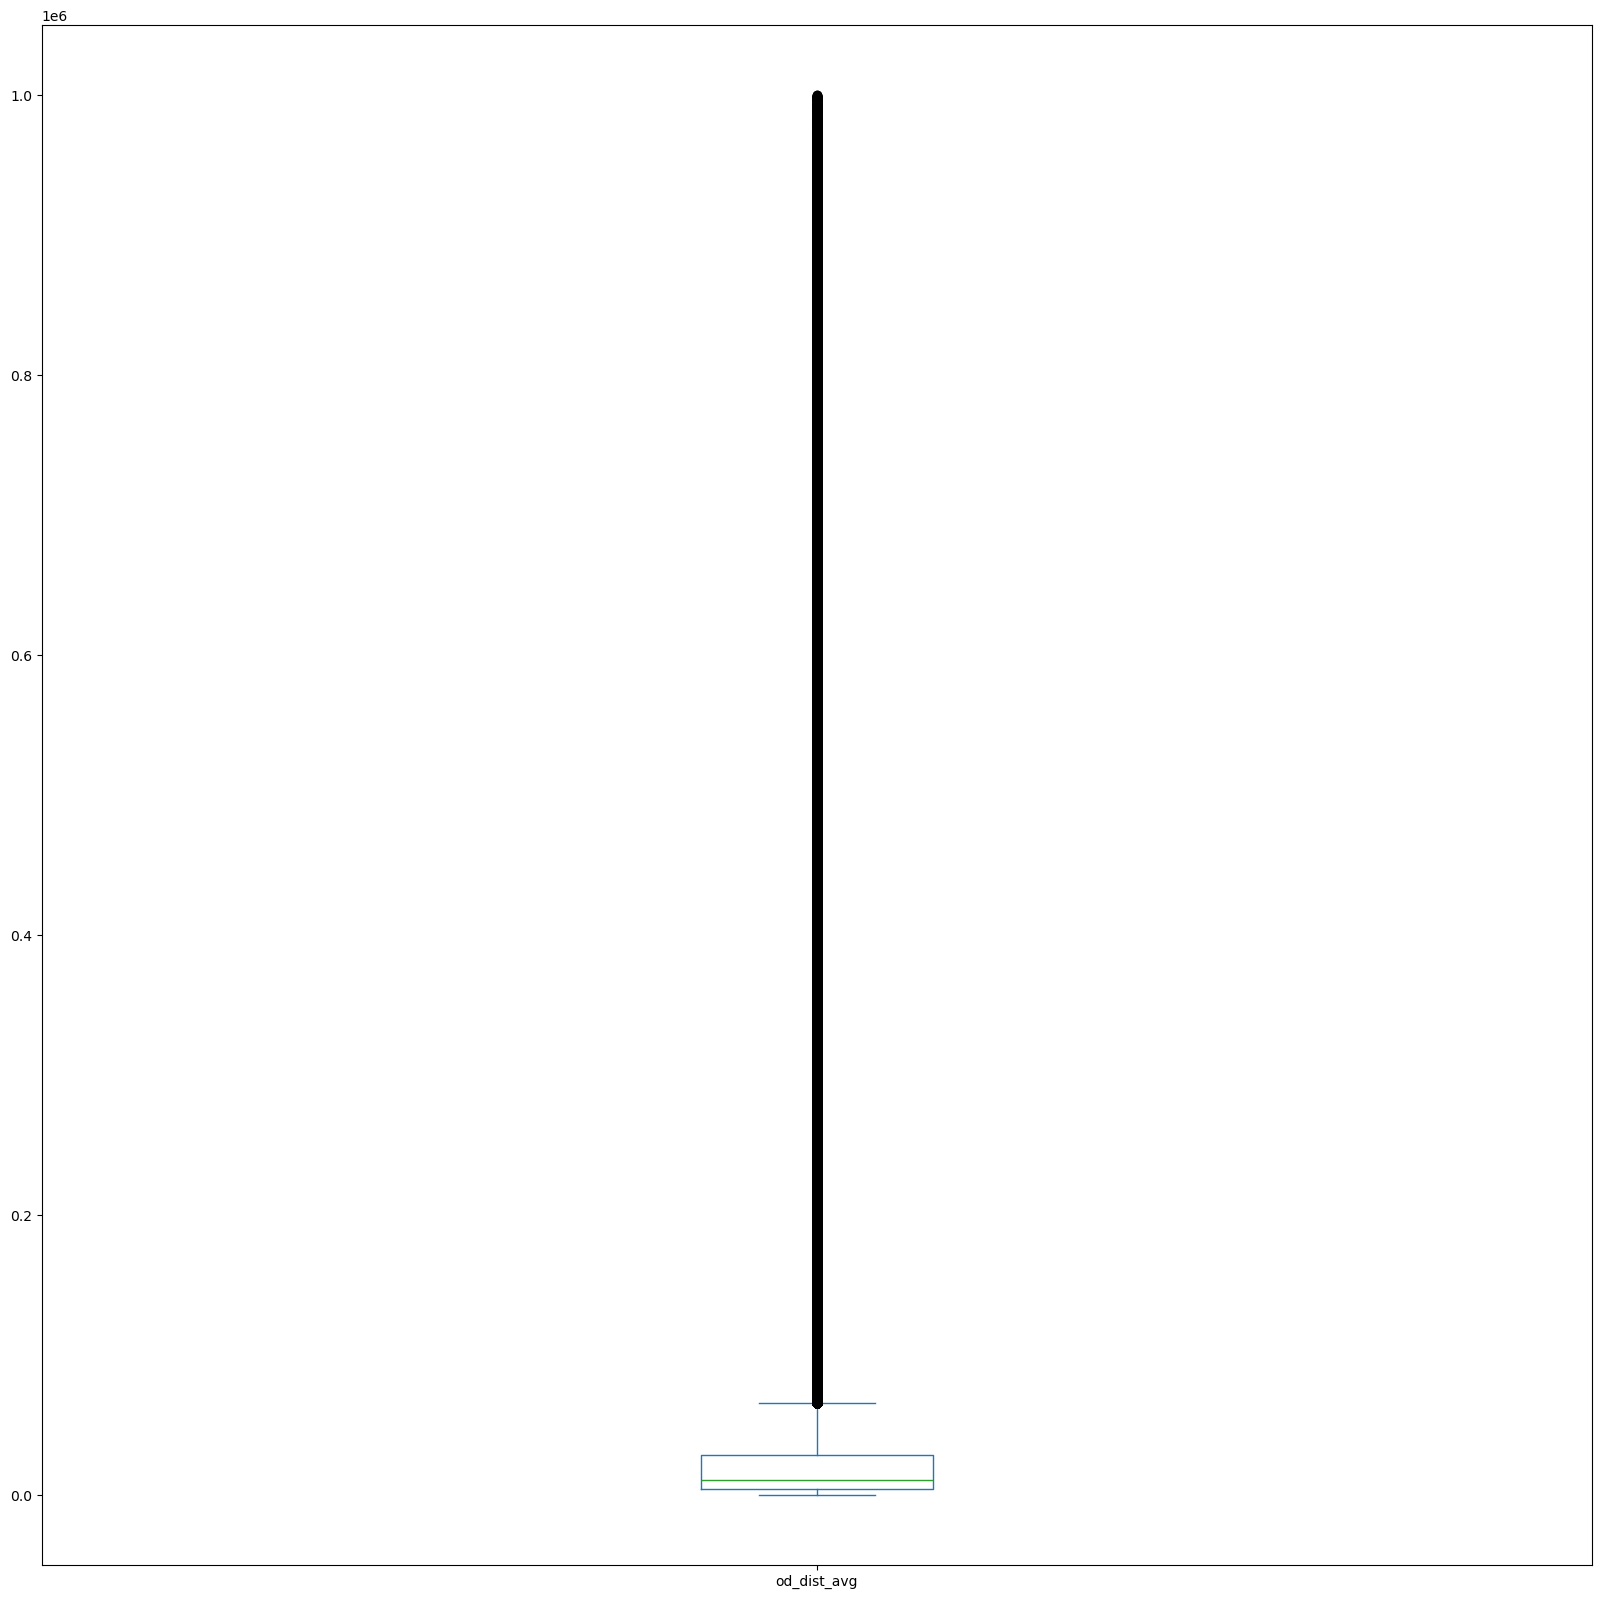

In [76]:
sep_01['od_dist_avg'].plot(
    kind='box',
    figsize=(20,20)
)

<Axes: >

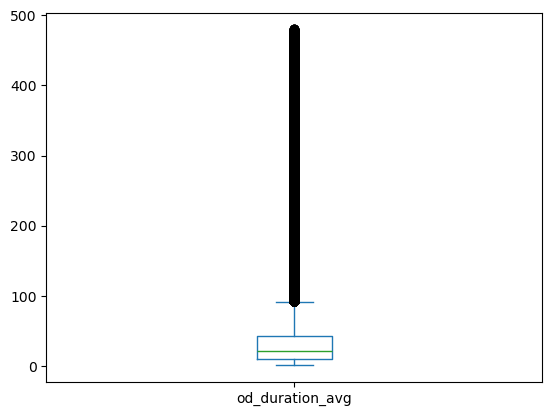

In [69]:
sep_01['od_duration_avg'].plot(
    kind='box'
)

In [81]:
sep_01['modal'].value_counts()

modal
0.0    2727739
4.0     460904
1.0     367482
2.0     104584
3.0      61136
5.0       3211
7.0       1043
Name: count, dtype: int64

In [82]:
import matplotlib.pyplot as plt

In [ ]:
grouped = decoder.groupby(['코드종류'])
decoder_map = {name[0]: group.set_index('코드').drop('코드종류', axis = 1).squeeze() for name, group in grouped}

decoder_map['modal']


In [131]:
outlier_duration = sep_01[sep_01['od_duration_avg'] > 100]
outlier_duration.shape

(222722, 13)

In [201]:
outlier_solver =  sep_01.sort_values(by=['origin_hdong_cd', 'dest_hdong_cd'])


outlier_solver['gostop'] = outlier_solver['origin_hdong_cd'].astype(str) + ' ' +  outlier_solver['dest_hdong_cd'].astype(str)
outlier_solver['gostop']

7294       1111051500 1111053000
12871      1111051500 1111053000
36588      1111051500 1111053000
52259      1111051500 1111053000
69507      1111051500 1111053000
                   ...          
1090607    5183035000 5183034000
1103781    5183035000 5183034000
1344689    5183035000 5183034000
2023828    5183035000 5183034000
3711977    5183035000 5183034000
Name: gostop, Length: 3726136, dtype: object

In [204]:
outlier_solver = outlier_solver.iloc[:,3:]

In [208]:
outlier_solver = outlier_solver.iloc[:, [0, 1, 4, 7, 8, 9, 10]]
outlier_solver

,start_time,end_time,modal,od_dist_avg,od_duration_avg,od_cnts,gostop
7294,12:00,12:00,0.0,5451,12,21,1111051500 1111053000
12871,12:00,12:00,0.0,5960,11,24,1111051500 1111053000
36588,12:00,13:00,0.0,7852,19,7,1111051500 1111053000
52259,13:00,13:00,0.0,2504,4,8,1111051500 1111053000
69507,12:00,12:00,4.0,867,3,9,1111051500 1111053000
...,...,...,...,...,...,...,...
1090607,17:00,18:00,0.0,50969,48,6,5183035000 5183034000
1103781,10:00,11:00,0.0,47287,51,5,5183035000 5183034000
1344689,11:00,11:00,1.0,61568,26,6,5183035000 5183034000
2023828,15:00,16:00,0.0,109879,72,5,5183035000 5183034000


In [217]:
decoder_map['modal']

코드
0        차량
1      시내버스
2       지하철
3        도보
4        기타
5        철도
6    시외고속버스
7       항공기
Name: 종류, dtype: object

In [224]:
outlier_solver['od_velocity_avg'] =  outlier_solver['od_dist_avg'] / outlier_solver['od_duration_avg'] /1000*60
outlier_solver

/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_3625/2042732481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_solver['od_velocity_avg'] =  outlier_solver['od_dist_avg'] / outlier_solver['od_duration_avg'] /1000*60


,start_time,end_time,modal,od_dist_avg,od_duration_avg,od_cnts,gostop,od_velocity_avg
7294,12:00,12:00,0.0,5451,12,21,1111051500 1111053000,27.255000
12871,12:00,12:00,0.0,5960,11,24,1111051500 1111053000,32.509091
36588,12:00,13:00,0.0,7852,19,7,1111051500 1111053000,24.795789
52259,13:00,13:00,0.0,2504,4,8,1111051500 1111053000,37.560000
69507,12:00,12:00,4.0,867,3,9,1111051500 1111053000,17.340000
...,...,...,...,...,...,...,...,...
1090607,17:00,18:00,0.0,50969,48,6,5183035000 5183034000,63.711250
1103781,10:00,11:00,0.0,47287,51,5,5183035000 5183034000,55.631765
1344689,11:00,11:00,1.0,61568,26,6,5183035000 5183034000,142.080000
2023828,15:00,16:00,0.0,109879,72,5,5183035000 5183034000,91.565833


In [345]:
cur_category = 'modal'

nlist = ['od_dist_avg', 'od_duration_avg', 'od_velocity_avg']

normalplz = nlist[0]

In [340]:


grouped = outlier_solver.groupby(cur_category)

modal_thresholds = {}
# fig, axes = plt.subplots(nrows=len(grouped), figsize=(10, 5*len(grouped)))

for (key, group) in grouped:
    data = group[normalplz]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    modal_thresholds[key] =min(data.max(), Q3 + 1.5 * IQR)
    # ax.set_title(f'Category: {decoder_map[category][key]}')

modal_thresholds

conditions = [
    (outlier_solver[cur_category] == category) & (outlier_solver[normalplz] <= threshold)
    for category, threshold in modal_thresholds.items()
]

# 모든 조건을 OR 연산으로 결합
combined_condition = pd.concat(conditions, axis=1).any(axis=1)

outlier_solver =  outlier_solver[combined_condition]
outlier_solver

,start_time,end_time,modal,od_dist_avg,od_duration_avg,od_cnts,gostop,od_velocity_avg
7294,12:00,12:00,0.0,5451,12,21,1111051500 1111053000,27.255000
12871,12:00,12:00,0.0,5960,11,24,1111051500 1111053000,32.509091
36588,12:00,13:00,0.0,7852,19,7,1111051500 1111053000,24.795789
52259,13:00,13:00,0.0,2504,4,8,1111051500 1111053000,37.560000
69507,12:00,12:00,4.0,867,3,9,1111051500 1111053000,17.340000
...,...,...,...,...,...,...,...,...
2809568,21:00,21:00,0.0,9414,9,5,5183035000 5183032000,62.760000
2975186,18:00,18:00,0.0,5257,13,5,5183035000 5183032000,24.263077
2979988,14:00,14:00,0.0,15211,20,5,5183035000 5183032000,45.633000
3217786,21:00,21:00,1.0,20571,20,7,5183035000 5183032000,61.713000


In [344]:
outliers = sep_01.drop(outlier_solver.index)
outliers

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,1130563500,1130559500,20230901,12:00,13:00,1,3,0.0,1.0,1,10869,58,7
5,1165058100,1165058000,20230901,14:00,14:00,1,4,0.0,1.0,1,9067,8,15
6,4817075000,4817051500,20230901,12:00,12:00,1,4,0.0,1.0,4,17594,12,8
12,2614061500,2611058000,20230901,18:00,19:00,0,3,0.0,0.0,3,59052,77,9
18,2823756000,2823752000,20230901,16:00,16:00,1,0,4.0,0.0,0,1883,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726121,4311425300,4111158000,20230901,13:00,15:00,0,3,0.0,5.0,0,198995,133,5
3726123,4129054000,3017057000,20230901,19:00,21:00,0,3,0.0,0.0,5,349005,136,5
3726130,4825055000,2653064500,20230901,08:00,08:00,0,2,0.0,0.0,1,83284,42,5
3726134,1162066500,1162074500,20230901,10:00,11:00,1,2,1.0,0.0,0,22344,60,5


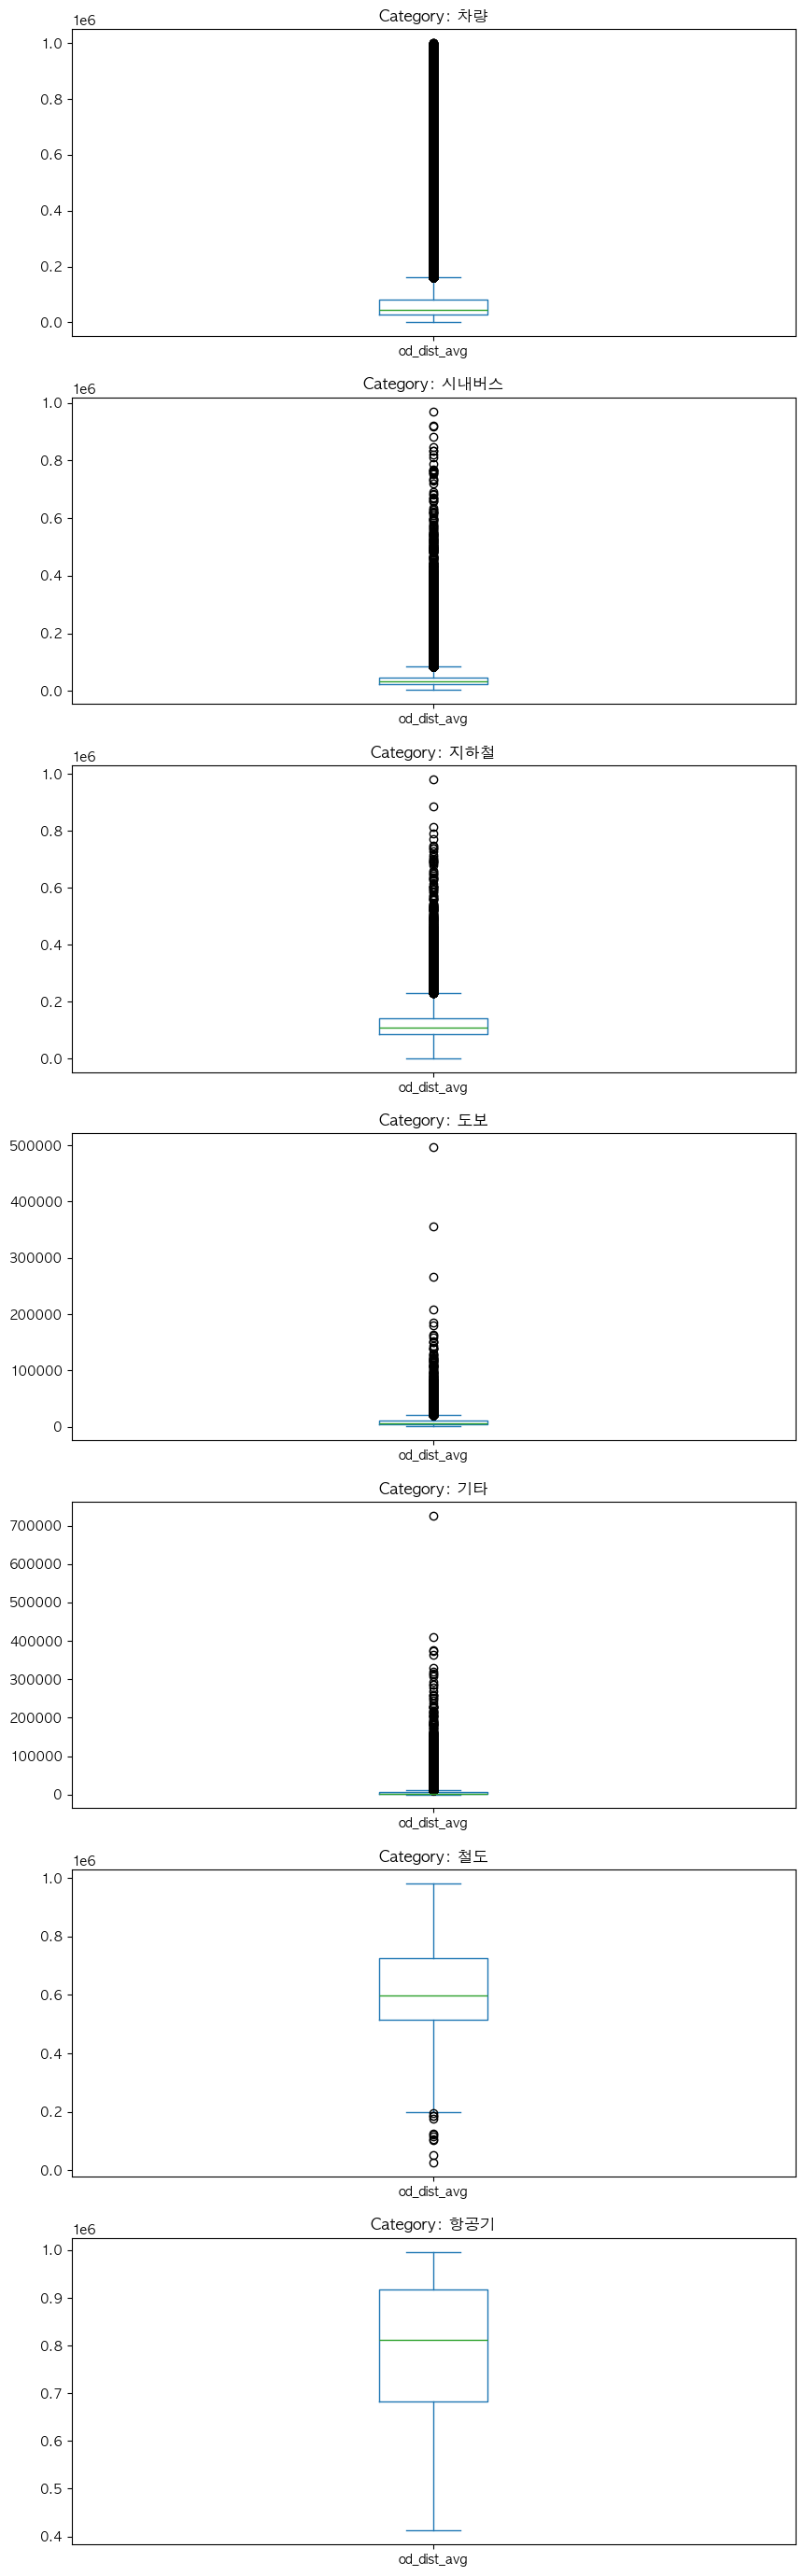

In [346]:
# 데이터프레임이 df라고 가정

grouped = outliers.groupby(cur_category)

fig, axes = plt.subplots(nrows=len(grouped), figsize=(10, 5*len(grouped)))

for (key, group), ax in zip(grouped, axes):
    group[normalplz].plot(kind='box',ax=ax)
    ax.set_title(f'Category: {decoder_map[cur_category][key]}')
# plt.tight_layout()
plt.show()

In [ ]:
# modal_thresholds = {
#     0: 95,  # 예: 자동차의 경우 100 km/h 이하
#     1 : 80,   # 예: 버스의 경우 80 km/h 이하
#     2 : 100, # 예: 지하철의 경우 200 km/h 이하
#     3 : 8, # 도보
#     4 : 40, # 기타?
#     5 : 220, # 철도
#     6 : 159,
#     7 : 2000
    
# }


,start_time,end_time,modal,od_dist_avg,od_duration_avg,od_cnts,gostop,od_velocity_avg
7294,12:00,12:00,0.0,5451,12,21,1111051500 1111053000,27.255000
12871,12:00,12:00,0.0,5960,11,24,1111051500 1111053000,32.509091
36588,12:00,13:00,0.0,7852,19,7,1111051500 1111053000,24.795789
52259,13:00,13:00,0.0,2504,4,8,1111051500 1111053000,37.560000
69507,12:00,12:00,4.0,867,3,9,1111051500 1111053000,17.340000
...,...,...,...,...,...,...,...,...
3168536,09:00,10:00,0.0,39523,33,8,5183035000 5183033000,71.860000
1090607,17:00,18:00,0.0,50969,48,6,5183035000 5183034000,63.711250
1103781,10:00,11:00,0.0,47287,51,5,5183035000 5183034000,55.631765
2023828,15:00,16:00,0.0,109879,72,5,5183035000 5183034000,91.565833


In [252]:
print(hdong.loc[1111051500], hdong.loc[1111053000])

시도명               서울특별시
시군구명                종로구
읍면동명              청운효자동
주소      서울특별시 종로구 청운효자동
Name: 1111051500, dtype: object 시도명             서울특별시
시군구명              종로구
읍면동명              사직동
주소      서울특별시 종로구 사직동
Name: 1111053000, dtype: object


In [180]:
outlier_duration.sort_values('od_dist_avg', axis=0, ascending=False).iloc[30:60].apply(series_decoder, axis=1)

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
3409295,강원특별자치도 강릉시 경포동,부산광역시 해운대구 재송제2동,20230901,14:00,20:00,남자,20 ~ 29세,차량,여행,기타,996363,359,6
499601,서울특별시 성동구 왕십리도선동,부산광역시 수영구 수영동,20230901,08:00,14:00,남자,20 ~ 29세,차량,여행,여행,996354,339,5
2137910,서울특별시 서초구 서초3동,제주특별자치도 제주시 삼도2동,20230901,16:00,19:00,남자,30 ~ 39세,항공기,기타,여행,996187,234,6
259383,전라북도 군산시 수송동,경기도 이천시 호법면,20230901,09:00,15:00,남자,0 ~ 9세,차량,귀가,여행,996088,375,13
352671,서울특별시 서초구 반포4동,전라북도 군산시 옥산면,20230901,13:00,17:00,여자,20 ~ 29세,차량,쇼핑여가,귀가,996081,245,6
453693,부산광역시 강서구 가덕도동,경기도 안성시 죽산면,20230901,11:00,17:00,남자,20 ~ 29세,차량,여행,여행,995915,330,7
2479032,광주광역시 광산구 어룡동,부산광역시 해운대구 우제1동,20230901,08:00,13:00,남자,10 ~ 19세,차량,귀가,여행,995783,289,7
642865,경상남도 통영시 봉평동,서울특별시 중랑구 중화제2동,20230901,14:00,19:00,남자,20 ~ 29세,차량,여행,여행,995544,341,5
2695851,서울특별시 강남구 삼성1동,부산광역시 해운대구 우제1동,20230901,15:00,21:00,남자,40 ~ 49세,차량,여행,여행,995062,331,5
900243,부산광역시 강서구 녹산동,경기도 화성시 팔탄면,20230901,14:00,21:00,남자,20 ~ 29세,차량,여행,귀가,994887,401,9


In [172]:
series_decoder(sep_01.iloc[outlier_duration['od_dist_avg'].idxmax(), :])

origin_hdong_cd     광주광역시 서구 풍암동
dest_hdong_cd      인천광역시 연수구 선학동
date                    20230901
start_time                 18:00
end_time                   22:00
gender                        여자
age                     30 ~ 39세
modal                         차량
origin_purpose                귀가
dest_purpose                  여행
od_dist_avg               999897
od_duration_avg              281
od_cnts                        5
Name: 1481845, dtype: object

In [135]:
outlier_duration['modal'].value_counts()

modal
0.0    195764
2.0     13053
1.0      8785
4.0      2052
5.0      1933
7.0      1006
3.0       115
Name: count, dtype: int64

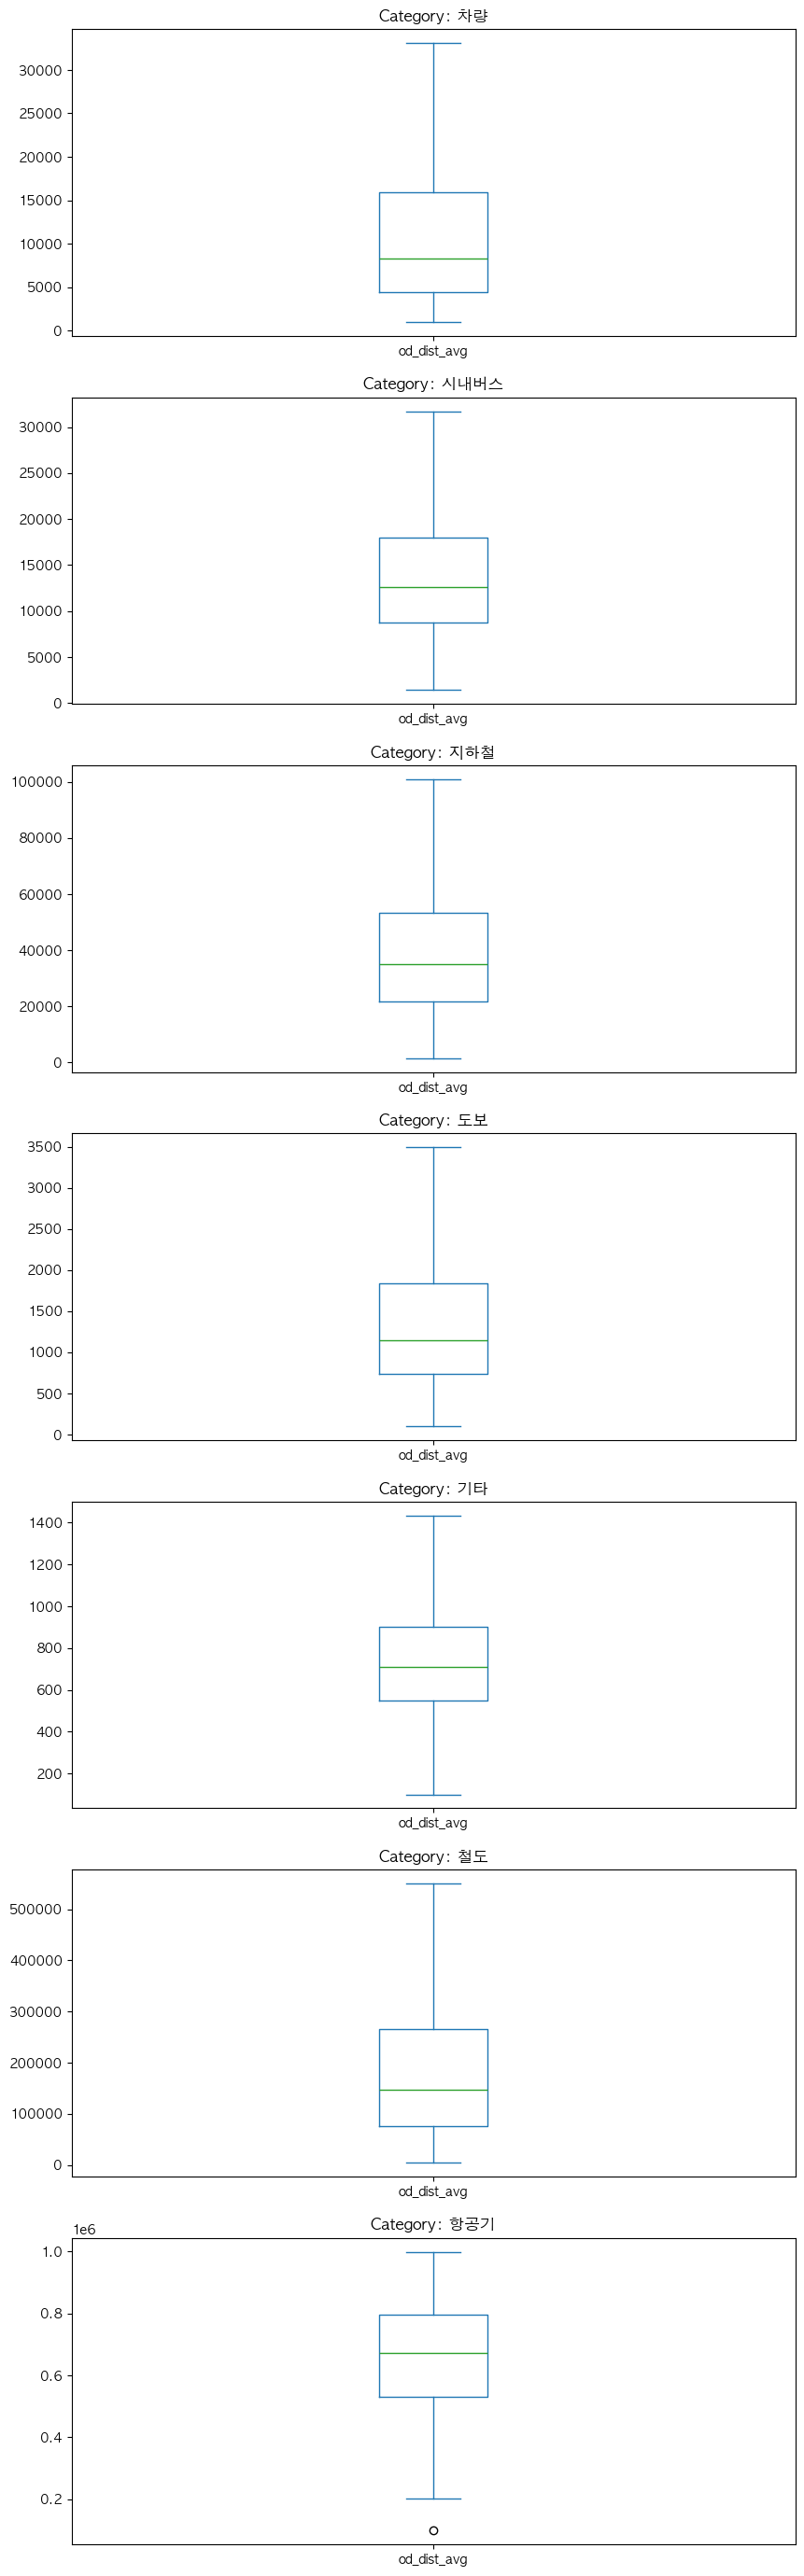

In [303]:
# 데이터프레임이 df라고 가정

category = 'modal'

grouped = outlier_solver.groupby(category)

fig, axes = plt.subplots(nrows=len(grouped), figsize=(10, 5*len(grouped)))

for (key, group), ax in zip(grouped, axes):
    group['od_dist_avg'].plot(kind='box',ax=ax)
    ax.set_title(f'Category: {decoder_map[category][key]}')
# plt.tight_layout()
plt.show()

In [77]:
(sep_01['od_dist_avg'] <10000).sum()

1740879

In [49]:
temp1 =  oct_07.groupby(['dest_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
temp1

,dest_hdong_cd,od_cnts
0,1174069000,228903
1,1171056600,130291
2,2635051000,116250
3,4713057000,95574
4,4121052000,84090
5,4513053000,82219
6,2920063700,77447
7,2641061000,74065
8,4139058900,72832
9,4139059100,69121


In [50]:
temp2 =  oct_07.groupby(['origin_hdong_cd'])['od_cnts'].sum().sort_values(ascending=False).reset_index().head(30)
temp2

,origin_hdong_cd,od_cnts
0,1156054000,109991
1,4127357000,67969
2,1117062500,66069
3,2635052000,65930
4,4513069000,62551
5,1174066000,61646
6,1144066000,61083
7,4833025300,53971
8,1147051000,53077
9,3114057000,52851


In [51]:
hdong.loc[temp1.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1174069000,서울특별시,강동구,둔촌제1동,서울특별시 강동구 둔촌제1동
1171056600,서울특별시,송파구,오륜동,서울특별시 송파구 오륜동
2635051000,부산광역시,해운대구,우제1동,부산광역시 해운대구 우제1동
4713057000,경상북도,경주시,황남동,경상북도 경주시 황남동
4121052000,경기도,광명시,광명2동,경기도 광명시 광명2동
4513053000,전라북도,군산시,월명동,전라북도 군산시 월명동
2920063700,광주광역시,광산구,수완동,광주광역시 광산구 수완동
2641061000,부산광역시,금정구,장전제2동,부산광역시 금정구 장전제2동
4139058900,경기도,시흥시,정왕본동,경기도 시흥시 정왕본동


In [52]:
hdong.loc[temp2.iloc[:,0]]

,시도명,시군구명,읍면동명,주소
행정동코드,,,,
1156054000,서울특별시,영등포구,여의동,서울특별시 영등포구 여의동
4127357000,경기도,안산시 단원구,초지동,경기도 안산시 단원구 초지동
1117062500,서울특별시,용산구,한강로동,서울특별시 용산구 한강로동
2635052000,부산광역시,해운대구,우제2동,부산광역시 해운대구 우제2동
4513069000,전라북도,군산시,수송동,전라북도 군산시 수송동
1174066000,서울특별시,강동구,성내제3동,서울특별시 강동구 성내제3동
1144066000,서울특별시,마포구,서교동,서울특별시 마포구 서교동
4833025300,경상남도,양산시,물금읍,경상남도 양산시 물금읍
1147051000,서울특별시,양천구,목1동,서울특별시 양천구 목1동


In [53]:
oct_07_yeo = oct_07[oct_07.dest_hdong_cd == 1156054000]
oct_07_yeo

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
99,1156056000,1156054000,20231007,18:00,19:00,1,2,0.0,0.0,4,33425,58,9
3038,4141057000,1156054000,20231007,11:00,15:00,0,0,0.0,4.0,5,82261,181,26
3259,1156067000,1156054000,20231007,16:00,17:00,1,0,0.0,0.0,4,17571,80,19
3702,1144058500,1156054000,20231007,16:00,17:00,1,0,0.0,3.0,5,9421,84,19
4410,1144059000,1156054000,20231007,19:00,19:00,1,3,0.0,4.0,4,8923,17,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546833,1156056000,1156054000,20231007,17:00,19:00,1,3,0.0,0.0,0,38055,106,5
3546973,1120054000,1156054000,20231007,16:00,18:00,0,2,2.0,0.0,4,93855,117,5
3547658,1154563000,1156054000,20231007,13:00,14:00,0,2,0.0,0.0,3,36819,61,5
3550840,1141058500,1156054000,20231007,16:00,17:00,0,2,0.0,4.0,4,44891,80,5


In [54]:
%reset

Nothing done.
